# Comparando a criação de modelo para predição de AVC com deep learning e utilizando Framework

## Autor
Lucas Gabriel Bezerra - 180125770

GitHub: lucasgbezerra

## Objetivo

A aula 5 do fastai apresenta a craição de uma rede neural do zero e ao final passa pela mesma criação de um modelo utilizando um framework.

Conhecer diferentes formas de realizar a mesma tarefa pode ser útil, mais ainda entender as diferenças e o que pode se ter de vantagem em cada uma das formas de se criar um modelo para predição.

**FALAR DO AVC**

## Motivação

Conhecer a criação de uma rede neural do zero, e entender como funciona o framework para realizar a mesma tarefa por trás da ferramenta.

In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


## Breve explicação do que é uma rede neural

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1200px-Neural_network_example.svg.png)
Uma rede neural é basicamente uma função matemática. No tipo padrão de rede neural, essa função multiplica cada entrada por um número de valores (paramêtros), soma-os para cada grupo de valores, substitui os números negativos por zero.

A explicação acima representa uma *layer*. Os passos dessa função são repetidas (as saídas da função são utilizadas como entradas para a próxima camada).

Os paramêtros são iniciados de maneira aleatória (ou seja seus resultados, inicialmente, não tem significado), porém eles são ajustados gradualmente para se tornarem melhores (isso é feito utilizando gradiente descendente).

## Limpeza do conjunto de dados

O primeiro passo para a criação de uma rede neural é analisar os dados. 
Após analisar os dados é possível perceber que alguns dados podem estar ausentes, ou podem estar em formatos que torna impossível a multiplicação por coeficientes, e isso deve ser contornado para a futura criação da rede neural.

In [181]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Conhecendo os dados

1. **id**: identificador único;
2. **gender**: gênero do paciente ("Male", "Female" or "Other")
3. **age**: idade do paciente em anos
4. **hypertension**: paciente tem hipertenção (1), paciente não tem hipertenção (0)
5. **heart_disease**:  paciente tem doença cardíaca (1), paciente não tem doença cardíaca (0)
6. **ever_married**: o paciente é casado ("No" or "Yes")
7. **work_type**: área de ocupação do paciente ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed")
8. **Residence_type**: tipo de área na qual o paciente reside ("Rural" or "Urban")
9. **avg_glucose_level**: nível médio de glicose no sangue
10. **bmi**: indíce de massa corporal (IMC)
11. **smoking_status**: define se status do paciente quanto ao uso de cigarro ("formerly smoked", "never smoked", "smokes" or "Unknown")
12. **stroke**: o pacente teve um AVC (1), o paciente não teve um AVC (0)

O dataset utilizado possui diferentes tipos de dados, alguns desles strings, o que impossibilita a multiplicação da coluna pelos coeficientes. Além disso, dados como o id não são úteis para a predição, visto que apenas identificam o paciente.

In [183]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

A coluna bmi possui 201 valores nulos, uma forma de contorna essa ausência de valores é considerar o valor mais comum de bmi para preencher os espaços nulos. Para isso será utilizado o método *mode()* para obter os valores comuns e fillna() para preencher os espaços nulos.

In [184]:
modes = df.mode().iloc[0]
modes

id                             67
gender                     Female
age                          78.0
hypertension                  0.0
heart_disease                 0.0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           93.88
bmi                          28.7
smoking_status       never smoked
stroke                        0.0
Name: 0, dtype: object

In [185]:
df.fillna(modes, inplace=True)

In [186]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [187]:
df.describe(include=(np.number))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.885636,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698109,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [188]:
df['log_glucose_level'] = np.log(df['avg_glucose_level'])

<AxesSubplot:>

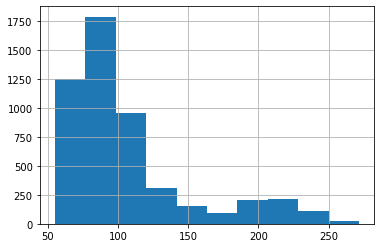

In [189]:
df['avg_glucose_level'].hist()

<AxesSubplot:>

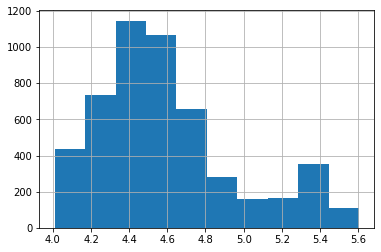

In [190]:
df['log_glucose_level'].hist()

In [191]:
df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


O método *describe(include=[object])* nos indica dados que são do tipo object, esses dados não são númericos pois são categorias. Esse tipo de dado nos impede de multiplica-los pelos coeficientes, portanto será necessário substitui-los por números.

Para isso será utilizado o método do pandas *get_dummies()*. Ela cria variáveis dummy(tipo de variável binária  usadas para representar valores categóricos) a partir de um conjunto de dados.


In [192]:
df = pd.get_dummies(df, columns=['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status'])
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'log_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [193]:
df[['gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']].head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


## Preparando modelo linear

In [194]:
from torch import tensor, torch

tensor_dep = tensor(df.stroke)

In [195]:
indep_cols = [c for c in df.columns if c not in {'id', 'stroke'}]
tensor_indepentes = tensor(df[indep_cols].values, dtype=torch.float)
tensor_indepentes[0]

tensor([ 67.0000,   0.0000,   1.0000, 228.6900,  36.6000,   5.4324,   0.0000,   1.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000,
          1.0000,   0.0000,   0.0000,   0.0000,   1.0000,   0.0000,   1.0000,   0.0000,   0.0000])

In [196]:
tensor_indepentes.shape

torch.Size([5110, 22])

In [197]:
torch.manual_seed(42)

num_coeff = tensor_indepentes.shape[1]
coeffs = torch.rand(num_coeff)-0.5
coeffs

tensor([ 0.3823,  0.4150, -0.1171,  0.4593, -0.1096,  0.1009, -0.2434,  0.2936,  0.4408, -0.3668,  0.4346,  0.0936,  0.3694,  0.0677,
         0.2411, -0.0706,  0.3854,  0.0739, -0.2334,  0.1274, -0.2304, -0.0586])

In [198]:
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=22)
tensor_indepentes * coeffs

tensor([[    25.6120,      0.0000,     -0.1171,    105.0386,     -4.0096,      0.5481,     -0.0000,      0.2936,      0.0000,     -0.0000,
              0.4346,      0.0000,      0.0000,      0.0677,      0.0000,     -0.0000,      0.0000,      0.0739,     -0.0000,      0.1274,
             -0.0000,     -0.0000],
        [    23.3184,      0.0000,     -0.0000,     92.8762,     -3.1441,      0.5357,     -0.2434,      0.0000,      0.0000,     -0.0000,
              0.4346,      0.0000,      0.0000,      0.0000,      0.2411,     -0.0000,      0.3854,      0.0000,     -0.0000,      0.0000,
             -0.2304,     -0.0000],
        [    30.5815,      0.0000,     -0.1171,     48.6497,     -3.5604,      0.4704,     -0.0000,      0.2936,      0.0000,     -0.0000,
              0.4346,      0.0000,      0.0000,      0.0677,      0.0000,     -0.0000,      0.3854,      0.0000,     -0.0000,      0.0000,
             -0.2304,     -0.0000],
        [    18.7312,      0.0000,     -0.0000,     78.646

Realizando a multiplicação dos coeficientes pelos valores independentes, percebe-se que duas colunas são dominantes, age(idade) e avg_glucose_level(média de nível de glicose)

Para evitar que na soma das linhas as colunas citadas dominem(estão muito acima da média), vamos dividir o valor pelo máximo valor da coluna para que todas as colunas estejam entre 1 e 0

In [199]:
max_values, _ = tensor_indepentes.max(dim=0)
tensor_indepentes = tensor_indepentes / max_values

In [200]:
tensor_indepentes * coeffs

tensor([[ 0.3123,  0.0000, -0.1171,  0.3865, -0.0411,  0.0978, -0.0000,  0.2936,  0.0000, -0.0000,  0.4346,  0.0000,  0.0000,  0.0677,
          0.0000, -0.0000,  0.0000,  0.0739, -0.0000,  0.1274, -0.0000, -0.0000],
        [ 0.2844,  0.0000, -0.0000,  0.3418, -0.0322,  0.0956, -0.2434,  0.0000,  0.0000, -0.0000,  0.4346,  0.0000,  0.0000,  0.0000,
          0.2411, -0.0000,  0.3854,  0.0000, -0.0000,  0.0000, -0.2304, -0.0000],
        [ 0.3729,  0.0000, -0.1171,  0.1790, -0.0365,  0.0839, -0.0000,  0.2936,  0.0000, -0.0000,  0.4346,  0.0000,  0.0000,  0.0677,
          0.0000, -0.0000,  0.3854,  0.0000, -0.0000,  0.0000, -0.2304, -0.0000],
        [ 0.2284,  0.0000, -0.0000,  0.2894, -0.0386,  0.0926, -0.2434,  0.0000,  0.0000, -0.0000,  0.4346,  0.0000,  0.0000,  0.0677,
          0.0000, -0.0000,  0.0000,  0.0739, -0.0000,  0.0000, -0.0000, -0.0586],
        [ 0.3683,  0.4150, -0.0000,  0.2943, -0.0269,  0.0929, -0.2434,  0.0000,  0.0000, -0.0000,  0.4346,  0.0000,  0.0000,  0.000

## Funções para gerar um modelo linear

As funções a seguir serão utilizadas para gerar uma modelo linear, que é mais simples que uma rede neural, e auxilia a entender a rede neural

A função *calculate_preds()* é dedicada a fazer a multiplicação de matriz e vetor, e retornar as predições com base nos coeficientes e nos valores independentes passados.

Essa função utiliza o método *torch.sigmoid()*. Devido ao fato da multiplicação de *indeps* e *coeffs* retornar valores que podem estar acima de 1 e abaixo de 0 isso é problematico para a predição, a fim de centralizar os valores entre 0 e 1, eles serão passados por um função sigmoid, que tem o seguinte formato:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/800px-Logistic-curve.svg.png)

Além disso, outro ponto a se ressaltar na função é *@*. Calcular as predições é basicamente um produto de matriz e vetor. Uma forma de fazer isso é multiplicar os elementos (cada elemento da linha da matriz por cada elemento do vetor) em seguida, adicionar entre linhas, da seguinte maneira *(indeps\*coeffs).sum(axis=1)*. Todavia, python possui o operador *@* para realizar isso.

In [201]:
def calculate_preds(coeffs, indeps): 
    return torch.sigmoid(indeps@coeffs)

Função de perda utilizando MAE(mean absolute error).
O **MAE** é a média das diferenças absolutas entre os valores previstos e os valores verdadeiros.

In [202]:
def calc_loss(coeffs, indeps, deps): 
    return torch.abs(calculate_preds(coeffs, indeps)-deps).mean()

Iniciando os coeficientes aléatoriamente com valores até 1 multiplicados por 0.1. o método *requires_grad_()* é utilizado para habilitar o rastreamento de operações matemáticas realizadas nesse tensor. O PyTorch irá manter um registro de todas as operações matemáticas realizadas com esse tensor, permitindo que o gradiente dessas operações seja calculado posteriormente.

In [203]:
def init_coefficients():
    return  (torch.rand(num_coeff)-0.5).requires_grad_()

Atualiza os coeficientes com base em uma taxa de learning rate (lr).

O método *sub()_* do PyTorch é usado para subtrair um tensor de outro, ele é aplicado sobre os coeficientes e recebe como argumento o atributo *grad* (armazena o gradiente de uma determinada operação matemática em relação a esse tensor) do coeficiente multiplicado pela lr.

Por fim, para zerar o gradiente armaenado utilizase o método *zero_()*


In [204]:
def update_coefficients(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

Função para exibir os coeficientes de cada coluna

In [205]:
def show_coeffs(coeffs): 
    return dict(zip(indep_cols, coeffs.requires_grad_(False)))


## Gradiente descendente

O gradiente descendente é um algoritmo utilizado para ajustar os parâmetros de um modeloa minimizar uma função de perda. 

![](https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png)

A ideia é que a cada iteração do treinamento, os parâmetros do modelo sejam atualizados na direção que minimiza perda. 

Na função *gd_step()* a perda é calculada, o método *loss.backward()* calcula o gradiente da função de perda em relação aos tensores que possuem o atributo requires_grad = True, os coeficientes atualizados e o passo é finalizado

In [206]:
def gd_step(coeffs, lr):
    loss = calculate_loss(coeffs, train_indep, train_dep)
    loss.backward()
    with torch.no_grad(): 
            update_coefficients(coeffs, lr)
    print(f"{loss:.3f},",end=";")

## Treinamento do modelo linear
Função de treinamento do modelo. inicia os coeficientes e aplica a gradiente descendente por x épocas retornando os coeficients obtidos ao final

In [207]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(42)
    coeffs = init_coefficients()
    for i in range(epochs):
        gd_step(coeffs, lr)
    return coeffs

In [208]:
from fastai.data.transforms import RandomSplitter
train_ds, valid_ds = RandomSplitter(seed=42)(df)

In [212]:
train_indep = tensor_indepentes[train_ds]
valid_indep = tensor_indepentes[valid_ds]
train_dep = tensor_dep[train_ds]
valid_dep = tensor_dep[valid_ds]
len(train_indep), len(valid_indep)

(4088, 1022)

In [213]:
coeffs = train_model(20, lr=0.2)
show_coeffs(coeffs)

0.640,;0.617,;0.593,;0.567,;0.540,;0.512,;0.484,;0.455,;0.427,;0.400,;0.374,;0.349,;0.326,;0.305,;0.285,;0.267,;0.251,;0.237,;0.223,;0.212,;

{'age': tensor(0.0188),
 'hypertension': tensor(0.3573),
 'heart_disease': tensor(-0.1461),
 'avg_glucose_level': tensor(0.1877),
 'bmi': tensor(-0.3210),
 'log_glucose_level': tensor(-0.4825),
 'gender_Female': tensor(-0.6496),
 'gender_Male': tensor(-0.0149),
 'gender_Other': tensor(0.4405),
 'ever_married_No': tensor(-0.6096),
 'ever_married_Yes': tensor(-0.0376),
 'work_type_Govt_job': tensor(-0.0010),
 'work_type_Never_worked': tensor(0.3656),
 'work_type_Private': tensor(-0.3354),
 'work_type_Self-employed': tensor(0.1239),
 'work_type_children': tensor(-0.1669),
 'Residence_type_Rural': tensor(0.0230),
 'Residence_type_Urban': tensor(-0.2787),
 'smoking_status_Unknown': tensor(-0.4511),
 'smoking_status_formerly smoked': tensor(0.0065),
 'smoking_status_never smoked': tensor(-0.4930),
 'smoking_status_smokes': tensor(-0.1724)}

## Medindo a acurácia

Após treinar o modelo é preciso saber quão bom ele é em acertar as predições. Para isso será criada uma função de medição de acuracia comparando o a predição do conjunto de validação com o valor de validação dependente (stroke)

In [227]:
def acc(coeffs): 
    return (valid_dep.bool()==(calculate_preds(coeffs, valid_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.9579)

In [228]:
acc(coeffs)

tensor(0.9579)

## Evoluindo para uma Rede neural

Agora que já conhecemos os conceitas das funções, e como é feito uma rede linear, vamos para o proximo passo, a rede neural.

Primeiro, a função de inicializar os coeficientes será alterada. Uma rede neural, não é linear, ela possui mais de 1 camada, e por isso os coeficientes precisam ser inicialiados para cada camada.

Os coeficientes da primeira camada são criados aleatóriamente a partir do número de coeficientes(num_coeffs) e do número de neurônios da camada (num_hidden), quanto mais alto mais flexível será a rede

A segunda camada utilizara *num_hidden* para criar uma única saída e um termo constante para adição

In [229]:
def init_coefficients(num_hidden=20):
    layer1 = (torch.rand(num_coeff, num_hidden)-0.5)/num_hidden
    layer2 = torch.rand(num_hidden, 1)-0.3
    
    const = torch.rand(1)[0]
    
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()
    

Com diferentes coeficientes, uma nova função para calcular as predições será necessária.
Ao invés de utilizar o simples *indeps@coeffs*, serão feitos dois produtos de matriz. A *layer1* pela matriz de valores independentes e a matriz obtida multiplicada pela layer2 somada a constante.

In [230]:
import torch.nn.functional as func

def calculate_preds(coeffs, indeps):
    layer1, layer2, const = coeffs
    
    result = func.relu(indeps@layer1)
    result = result@layer2 + const
    
    return torch.sigmoid(result)

A atualização de coeficientes também muda, visto que agora temos coeficientes para cada layer

In [231]:
def update_coefficients(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [232]:
coeffs = train_model(lr=20)

0.610,;0.055,;0.052,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.051,;0.050,;0.050,;0.050,;0.050,;0.050,;

In [233]:
acc(coeffs)

tensor(0.9579)

## Utilizando um Framework fastai

Um framework facilita a criação de um modelo da seguinte maneira:
* As melhores práticas são tratadas para você automaticamente
* Menos tempo gasto na configuração
* Menos trabalho para diferentes tentativa

Importação da lib para dados tabulares do fastai

In [234]:
from fastai.tabular.all import *

### Preparação dos dados

In [235]:
df_framework = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df_framework.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [236]:
df_framework.drop(columns=['id'], inplace=True)
df_framework.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [237]:
splits = RandomSplitter(seed=42)(df_framework)

A preparação dos dados se resume a poucas células, diferentemente do que foi feito anteriormente

In [238]:
dls = TabularPandas(
    df_framework, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["gender","ever_married","work_type","Residence_type", "smoking_status"],
    cont_names=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
    y_names="stroke", y_block = CategoryBlock(),
).dataloaders(path=".")

### Treinando o modelo

Os dados e o modelo juntos formam um leaner. Para criar um, dizemos quais são os dados (dls) e o tamanho de cada camada oculta ([10,10]), juntamente com as métricas

In [239]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

Utiliaremos o lr_find para encontrar o melhor learning rate para treinar um modelo. Isso é algo que o framework proporciona que não se tem na abordagem crua.

Escolheremos um ponto entre o slide e o valley, por ser um ponto de equilibrio portanto o melhor

SuggestedLRs(slide=0.05754399299621582, valley=0.010964781977236271)

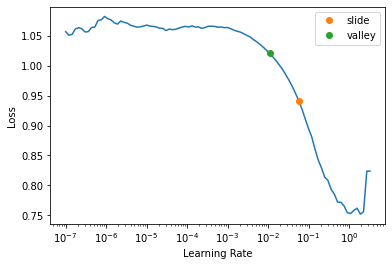

In [240]:
learn.lr_find(suggest_funcs=(slide, valley))

In [241]:
learn.fit(16, lr=0.025)

epoch,train_loss,valid_loss,accuracy,time
0,0.245469,0.138535,0.958904,00:00
1,0.176818,0.150945,0.957926,00:00
2,0.166909,0.139732,0.957926,00:00
3,0.164462,0.139714,0.958904,00:00
4,0.162989,0.142552,0.957926,00:00
5,0.161836,0.138143,0.957926,00:00
6,0.166524,0.145567,0.957926,00:00
7,0.162775,0.137419,0.957926,00:00
8,0.160619,0.141000,0.957926,00:00
9,0.163584,0.144033,0.957926,00:00


In [242]:
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=22)

tst = df_framework.iloc[:5]
tst_dl = learn.dls.test_dl(tst)
preds,labels = learn.get_preds(dl=tst_dl)
labels, preds

(tensor([[1],
         [1],
         [1],
         [1],
         [1]], dtype=torch.int8),
 tensor([[0.5172, 0.4828],
         [0.8636, 0.1364],
         [0.7885, 0.2115],
         [0.9711, 0.0289],
         [0.7788, 0.2212]]))

## Deploy

In [243]:
learn.export('learn_model.pkl')

## Conclusão

O uso de framework, facilita e diminui o o tempo gasto para se gerar um modelo.
A principal diferença que senti foi na hora de preparar os dados, a simplicidade que o framework do fastaAI provê faz com que o tempo para essa tarefa seja irrisório se comparado a fazer isso por si só.

Além disso, outra diferença foi para exportar o modelo, exportar a partir do fastai é simple e rápido, enquanto na mão é verbosos e complexo.